## Problem Statement:

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

#### Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
air = pd.read_csv('EastWestAirlines.csv')

In [4]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


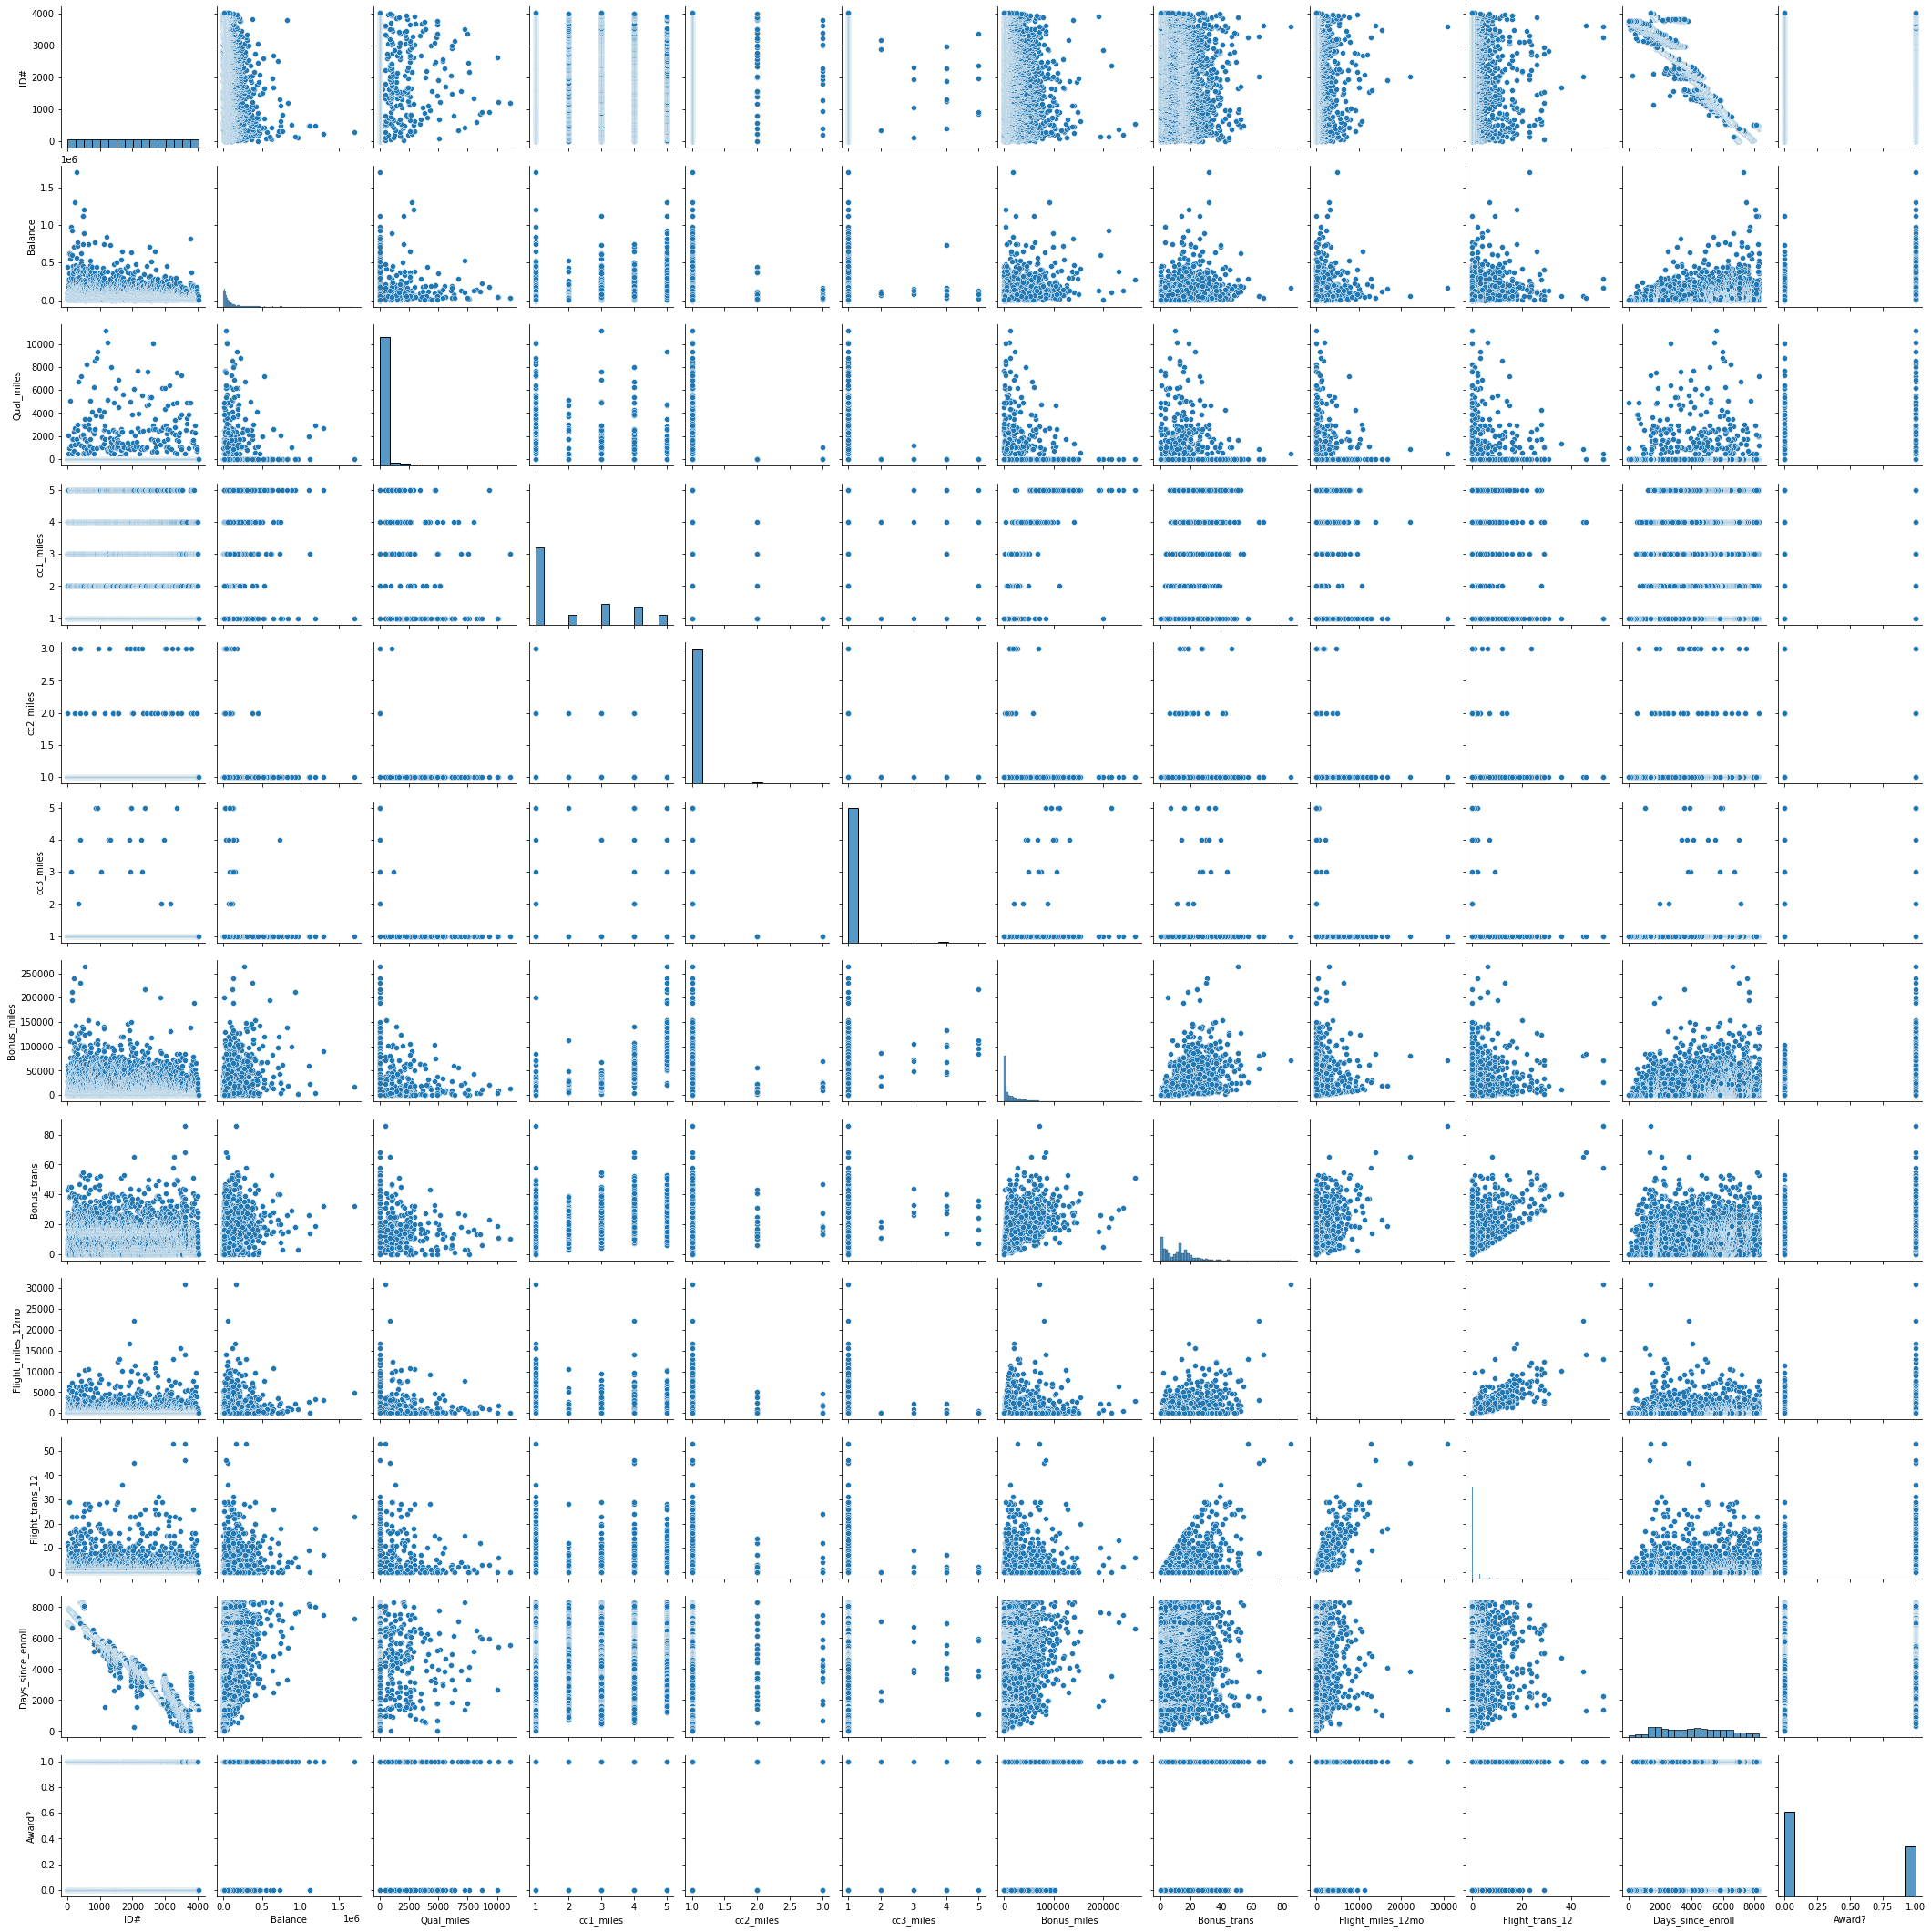

In [6]:
sns.pairplot(air)

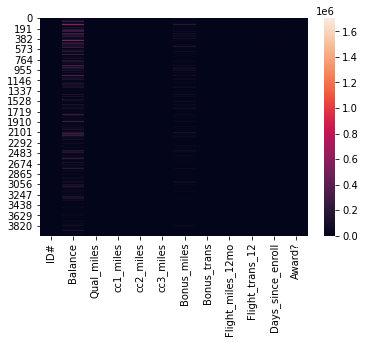

In [7]:
sns.heatmap(air)

In [8]:
air.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


# Data Preprocessing

In [9]:
air_data = air.iloc[:, :-1]
air_data.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,3,41354,0,1,1,1,4123,4,0,0,7034


In [10]:
air_std = scale(air_data)
air_std

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

# PCA

### Fitting standardized data using PCA

In [11]:
pca = PCA()
pca_values = pca.fit(air_std)

In [12]:
pca_values = pca.transform(air_std)
pca_values

array([[-5.58457103e-01, -1.87571407e+00, -1.87245571e+00, ...,
         5.07595452e-02, -1.06366621e-02,  2.20298722e-01],
       [-5.47467953e-01, -1.85086329e+00, -1.84306765e+00, ...,
         6.90527236e-02,  2.13886861e-03,  2.30450256e-01],
       [-3.03662107e-01, -1.84351888e+00, -1.75577045e+00, ...,
         1.90000805e-01,  5.40474145e-02,  2.12247801e-01],
       ...,
       [-8.30910440e-01,  9.03156582e-01,  1.86221392e+00, ...,
        -2.65638680e-01, -1.25608278e-01, -2.90927647e-01],
       [-2.07245585e+00,  1.35331322e+00,  4.98186152e-01, ...,
        -8.21028792e-02, -1.22443968e-02, -2.95032199e-01],
       [-2.47789876e+00,  1.03978561e+00,  6.81127053e-01, ...,
        -2.07032046e-02, -7.91497738e-02, -3.03001258e-01]])

### Cumulative variance plot

In [13]:
pca.explained_variance_ratio_

array([0.29252899, 0.17395991, 0.14047021, 0.09291357, 0.08856546,
       0.08702197, 0.06445242, 0.03299907, 0.01263834, 0.0113026 ,
       0.00314746])

Text(0, 0.5, 'Cummulative Explained Variance')

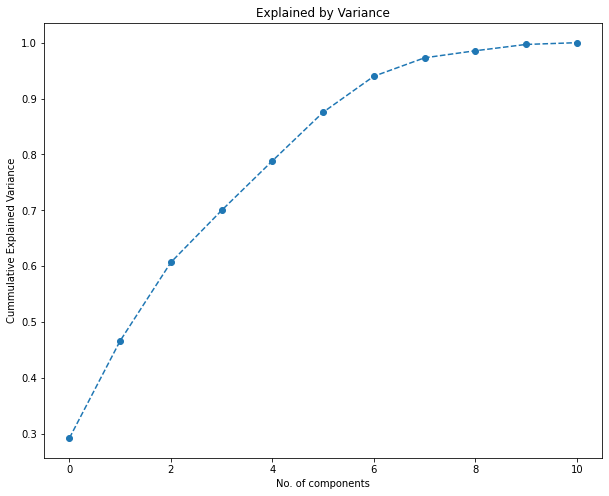

In [14]:
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained by Variance')
plt.xlabel('No. of components')
plt.ylabel('Cummulative Explained Variance')

### Plotting Principle components

In [35]:
air_df = pd.concat([air,pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])], axis = 1)
air_df.head(5)


# selecting 3 - P-Components and merging it with wine dataframe.

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,pc1,pc2,pc3
0,1,28143,0,1,1,1,174,1,0,0,7000,0,-0.558457,-1.875714,-1.872456
1,2,19244,0,1,1,1,215,2,0,0,6968,0,-0.547468,-1.850863,-1.843068
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,-0.303662,-1.843519,-1.755770
3,4,14776,0,1,1,1,500,1,0,0,6952,0,-0.604818,-1.862553,-1.854339
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3.175831,-0.607134,-0.558626


In [16]:
pca_df = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])], axis = 1)
pca_df.head(5)

# seperate dataframe of P-Components which later will be used for visualizing clusters.

,pc1,pc2,pc3
0,-0.558457,-1.875714,-1.872456
1,-0.547468,-1.850863,-1.843068
2,-0.303662,-1.843519,-1.755770
3,-0.604818,-1.862553,-1.854339
4,3.175831,-0.607134,-0.558626


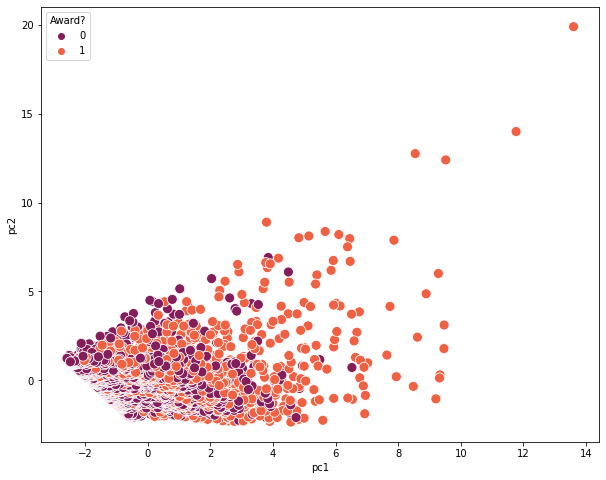

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=wine_df,x='pc1',y='pc2',s=100,hue='Award?', palette='rocket')

# K-Means Clustering with PCA

In [18]:
pca_values1 = pca_df.values
pca_values1

array([[-0.5584571 , -1.87571407, -1.87245571],
       [-0.54746795, -1.85086329, -1.84306765],
       [-0.30366211, -1.84351888, -1.75577045],
       ...,
       [-0.83091044,  0.90315658,  1.86221392],
       [-2.07245585,  1.35331322,  0.49818615],
       [-2.47789876,  1.03978561,  0.68112705]])

In [19]:
wcss = []
for i in range(1,12):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state = 0)
    kmeans_pca.fit(pca_values1)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'Cummulative Explained Variance')

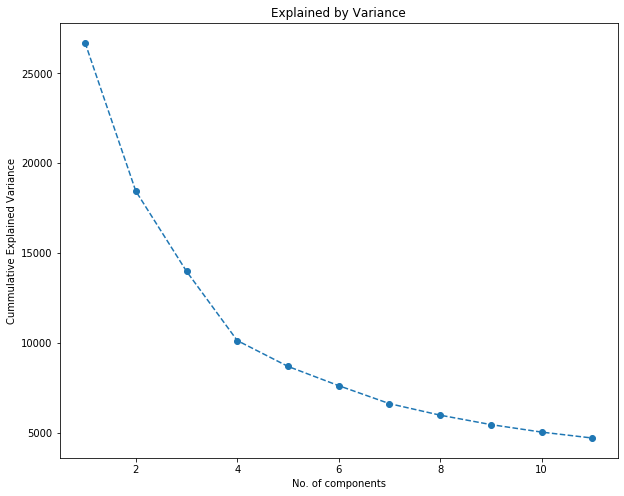

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,12),wcss, marker = 'o', linestyle = '--')
plt.title('Explained by Variance')
plt.xlabel('No. of components')
plt.ylabel('Cummulative Explained Variance')

In [20]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 40)

In [21]:
kmeans_pca.fit(pca_values1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=40, tol=0.0001, verbose=0)

In [22]:
df_pcs_kmeans = pd.concat([air.reset_index(drop = True), pd.DataFrame(pca_values1)], axis = 1)

In [23]:
df_pcs_kmeans.columns.values[-3:] = ['PC1', 'PC2', 'PC3']

In [24]:
df_pcs_kmeans['Clusters'] = kmeans_pca.labels_

In [25]:
df_pcs_kmeans['Segments'] = df_pcs_kmeans['Clusters'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth'})

## Plotting Clusters

In [26]:
x = df_pcs_kmeans['PC1']
y = df_pcs_kmeans['PC2']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


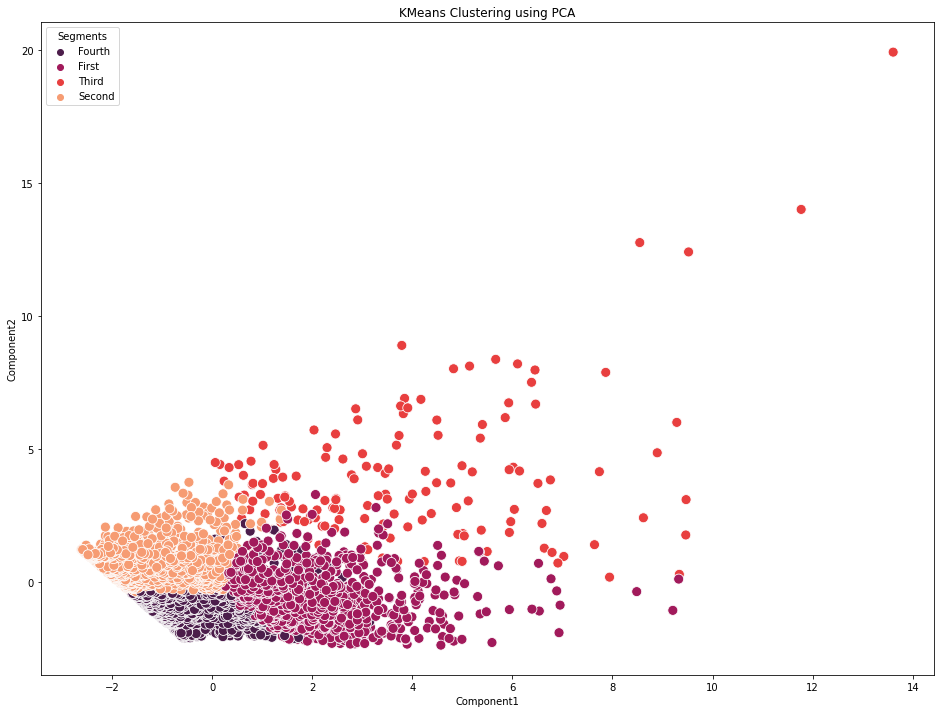

In [27]:
plt.figure(figsize= (16,12))
sns.scatterplot(x, y, hue = df_pcs_kmeans['Segments'], palette= 'rocket', s=100)
plt.title('KMeans Clustering using PCA')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.show()

# Hierarchical Clustering

In [56]:
from sklearn.preprocessing import normalize
data_scaled = normalize(air_data)
data_scaled = pd.DataFrame(data_scaled, columns=air_data.columns)
data_scaled.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000034,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.000098,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.000071,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.000245,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.000047,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718


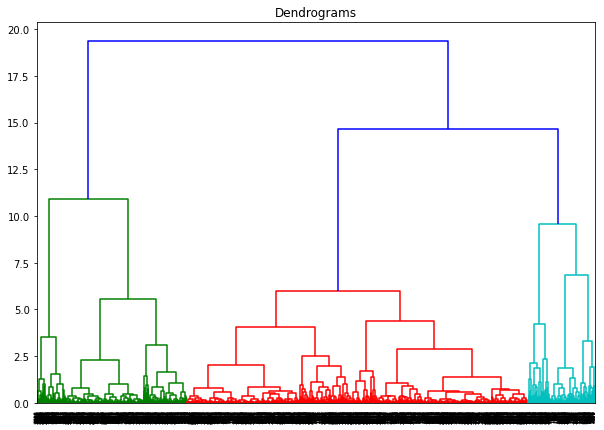

In [57]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [58]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([2, 0, 2, ..., 1, 2, 0])

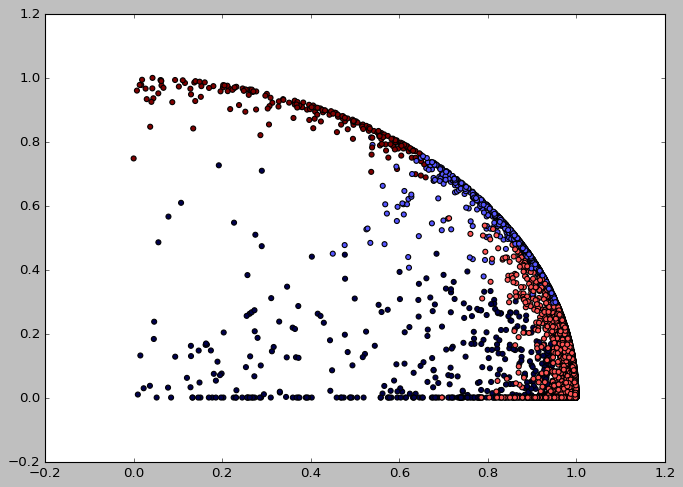

In [85]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Balance'], data_scaled['Bonus_miles'], c=cluster.labels_, cmap = 'seismic') 

# DBSCAN

In [60]:
array=air_data.values
array

array([[    1, 28143,     0, ...,     0,     0,  7000],
       [    2, 19244,     0, ...,     0,     0,  6968],
       [    3, 41354,     0, ...,     0,     0,  7034],
       ...,
       [ 4019, 73597,     0, ...,     0,     0,  1402],
       [ 4020, 54899,     0, ...,   500,     1,  1401],
       [ 4021,  3016,     0, ...,     0,     0,  1398]])

In [61]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X 

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [71]:
dbscan = DBSCAN(eps=0.9, min_samples=12)
dbscan.fit(X)         

DBSCAN(algorithm='auto', eps=0.9, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

In [72]:
#Noisy samples are given the label -1.
dbscan.labels_ 

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [74]:
cl
pd.set_option("display.max_rows", None)

In [75]:
df1 = pd.concat([air,cl],axis=1) 
df1.head()     

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [78]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Clusters using DBScan')

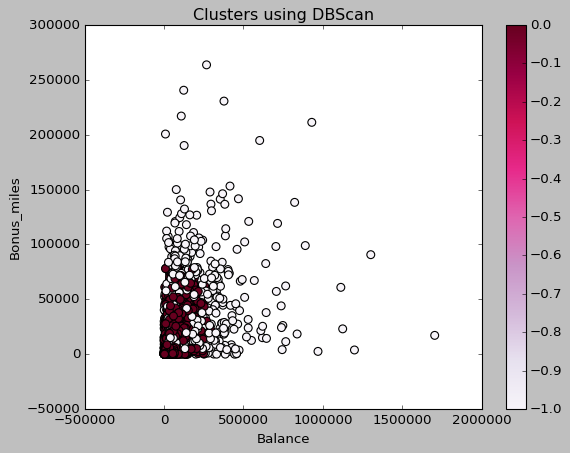

In [81]:
df1.plot(x="Balance",y ="Bonus_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap='PuRd') 
plt.title('Clusters using DBScan')  

### Here, we applied three different techniques for clustering. i. e.
- 1. K-Means Clusering - by using PCA and Elbow Method
- 2. Hierarchical Clustering - by Euclidean Distance
- 3. DBSCAN